# L3-A - Linear Quantization II: Symmetric vs. Asymmetric Mode

In this lesson, you will learn a different way of performing linear quantization, Symmetric Mode.

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

In [1]:
import torch

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode.

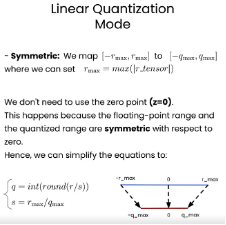

In [ ]:
# 对称量化情况下，针对给定的tensor和dtype，计算scale。
def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()  # 取得tensor中元素的最大值
    q_max = torch.iinfo(dtype).max  # 取得量化类型最大值

    # return the scale
    return r_max/q_max  # 计算scale

In [3]:
### test the implementation on a 4x4 matrix
test_tensor = torch.randn((4, 4))

**Note:** Since the values are random, what you see in the video might be different than what you will get.

In [4]:
test_tensor

tensor([[-1.2100,  0.4485, -1.0359,  0.2313],
        [ 0.2559, -0.1832, -0.1145, -0.5578],
        [-0.4906,  2.9639,  0.9968,  0.9481],
        [-2.6178,  1.1907, -0.4267,  0.5551]])

In [ ]:
# 对称量化情况下，针对test_tensor，计算scale
get_q_scale_symmetric(test_tensor)

0.023337596983421506

- Perform Linear Quantization in Symmetric Mode.
- `linear_q_with_scale_and_zero_point` is the same function you implemented in the previous lesson.

In [6]:
from helper import linear_q_with_scale_and_zero_point

In [ ]:
# 对称量化函数
def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor)  # 计算scale
    
    # 执行对称量化
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor,
                                                     scale=scale,
                   # in symmetric quantization zero point is = 0    
                                                    zero_point=0,
                                                      dtype=dtype)
    # 返回量化后的tensor和scale    
    return quantized_tensor, scale

In [ ]:
# 执行对称量化
quantized_tensor, scale = linear_q_symmetric(test_tensor)

### Dequantization

- Perform Dequantization
- Plot the Quantization error.
- `linear_dequantization` is the same function you implemented in the previous lesson.

In [9]:
from helper import linear_dequantization, plot_quantization_errors
from helper import quantization_error

In [ ]:
# 执行反量化
dequantized_tensor = linear_dequantization(quantized_tensor,scale,0)

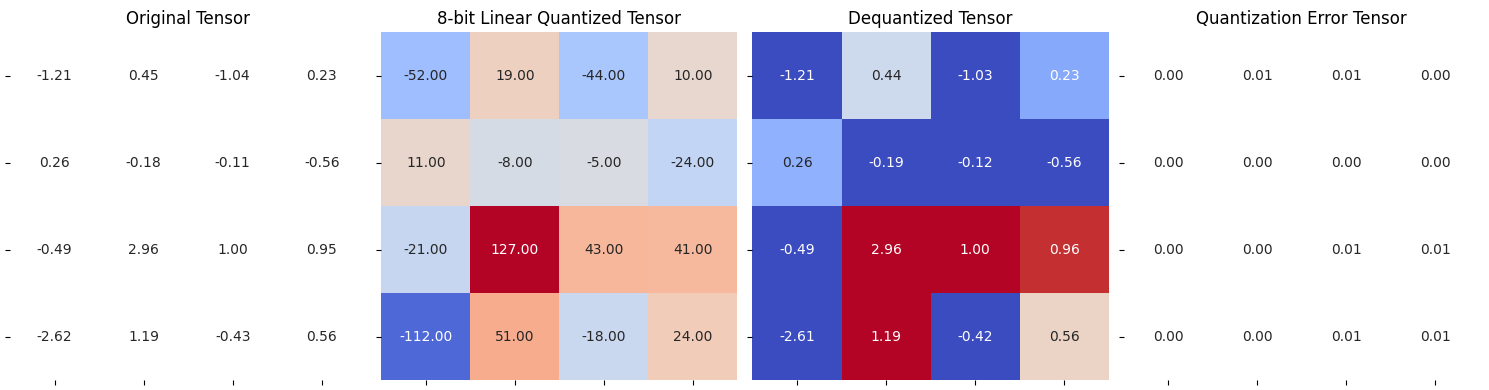

In [ ]:
# 图形化显示量化误差
plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

In [ ]:
# 总体量化误差很小
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")

Quantization Error : 2.2017919036443345e-05
